In [95]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [98]:
# directory where you have the parquet files. You need them to run any analysis.
# Download Parquets here: https://drive.google.com/open?id=1BkH7vfupcBaLs2gTYphff6z9Qvg-TcAq
# Extract parquet.tar.gz to the directory of you notebook or change the PARQUET_DIR
PARQUET_DIR = '../parquet/'

In [11]:
# Load dataframes listing the parquet files

#US reviews by category
with open('category_reviews.pickle', 'rb') as file:
    category_reviews = pickle.load(file)

# International reviews, by country
with open('multilingual_reviews.pickle', 'rb') as file:
    multilingual_reviews = pickle.load(file)

These dataframes list parquet filenames to access the data. It is not possible to load them all, as you will run into memory problems. Therefore, they must be analysed one by one.

Working on a single category (or country) is straightforward.

In [12]:
category_reviews

,filename,parquet,category
0,amazon_reviews_us_Shoes_v1_00.tsv.gz,amazon_reviews_us_Shoes_v1_00.parquet.gzip,Shoes
1,amazon_reviews_us_Mobile_Apps_v1_00.tsv.gz,amazon_reviews_us_Mobile_Apps_v1_00.parquet.gzip,Mobile_Apps
2,amazon_reviews_us_Personal_Care_Appliances_v1_...,amazon_reviews_us_Personal_Care_Appliances_v1_...,Personal_Care_Appliances
3,amazon_reviews_us_Home_Improvement_v1_00.tsv.gz,amazon_reviews_us_Home_Improvement_v1_00.parqu...,Home_Improvement
4,amazon_reviews_us_Digital_Video_Download_v1_00...,amazon_reviews_us_Digital_Video_Download_v1_00...,Digital_Video_Download
5,amazon_reviews_us_Kitchen_v1_00.tsv.gz,amazon_reviews_us_Kitchen_v1_00.parquet.gzip,Kitchen
6,amazon_reviews_us_Electronics_v1_00.tsv.gz,amazon_reviews_us_Electronics_v1_00.parquet.gzip,Electronics
7,amazon_reviews_us_Digital_Music_Purchase_v1_00...,amazon_reviews_us_Digital_Music_Purchase_v1_00...,Digital_Music_Purchase
8,amazon_reviews_us_Video_v1_00.tsv.gz,amazon_reviews_us_Video_v1_00.parquet.gzip,Video
9,amazon_reviews_us_Musical_Instruments_v1_00.ts...,amazon_reviews_us_Musical_Instruments_v1_00.pa...,Musical_Instruments


In [13]:
multilingual_reviews.head()

,filename,parquet,country
3,amazon_reviews_multilingual_US_v1_00.tsv.gz,amazon_reviews_multilingual_US_v1_00.parquet.gzip,US
14,amazon_reviews_multilingual_FR_v1_00.tsv.gz,amazon_reviews_multilingual_FR_v1_00.parquet.gzip,FR
27,amazon_reviews_multilingual_UK_v1_00.tsv.gz,amazon_reviews_multilingual_UK_v1_00.parquet.gzip,UK
36,amazon_reviews_multilingual_JP_v1_00.tsv.gz,amazon_reviews_multilingual_JP_v1_00.parquet.gzip,JP
39,amazon_reviews_multilingual_DE_v1_00.tsv.gz,amazon_reviews_multilingual_DE_v1_00.parquet.gzip,DE


In [26]:
# An example review set is loaded as follows:
df_shoes = pd.read_parquet(PARQUET_DIR + category_reviews[category_reviews.category == 'Shoes'].loc[0]['parquet'])
df_shoes.head()

,customer_id,review_id,product_parent,product_category,star_rating,helpful_votes,total_votes,review_date
0,18069663,R3P2HIOQCIN5ZU,265024781,Shoes,1,0,0,2015-08-31
1,16251825,R12VVR0WH5Q24V,259035853,Shoes,5,0,0,2015-08-31
2,20381037,RNCCKB6TV5EEF,666066660,Shoes,4,0,0,2015-08-31
3,108364,R2NZXYIVCGB13W,448483263,Shoes,5,0,6,2015-08-31
4,45449350,R2EQ1TG9IT3OEQ,7853171,Shoes,3,0,0,2015-08-31


In [27]:
df_shoes.shape[0]

4366761

# Sample analysis

Let's count reviews per category.

In [28]:
def count_reviews(parquet_file):
    """
    Counts reviews from specified file
    """
    df = pd.read_parquet(PARQUET_DIR + parquet_file)
    return df.shape[0]

In [29]:
category_reviews['review_count'] = category_reviews['parquet'].apply(count_reviews)
category_reviews

,filename,parquet,category,review_count
0,amazon_reviews_us_Shoes_v1_00.tsv.gz,amazon_reviews_us_Shoes_v1_00.parquet.gzip,Shoes,4366761
1,amazon_reviews_us_Mobile_Apps_v1_00.tsv.gz,amazon_reviews_us_Mobile_Apps_v1_00.parquet.gzip,Mobile_Apps,5033305
2,amazon_reviews_us_Personal_Care_Appliances_v1_...,amazon_reviews_us_Personal_Care_Appliances_v1_...,Personal_Care_Appliances,85978
3,amazon_reviews_us_Home_Improvement_v1_00.tsv.gz,amazon_reviews_us_Home_Improvement_v1_00.parqu...,Home_Improvement,2634428
4,amazon_reviews_us_Digital_Video_Download_v1_00...,amazon_reviews_us_Digital_Video_Download_v1_00...,Digital_Video_Download,4056597
5,amazon_reviews_us_Kitchen_v1_00.tsv.gz,amazon_reviews_us_Kitchen_v1_00.parquet.gzip,Kitchen,4880210
6,amazon_reviews_us_Electronics_v1_00.tsv.gz,amazon_reviews_us_Electronics_v1_00.parquet.gzip,Electronics,3093750
7,amazon_reviews_us_Digital_Music_Purchase_v1_00...,amazon_reviews_us_Digital_Music_Purchase_v1_00...,Digital_Music_Purchase,1688652
8,amazon_reviews_us_Video_v1_00.tsv.gz,amazon_reviews_us_Video_v1_00.parquet.gzip,Video,380576
9,amazon_reviews_us_Musical_Instruments_v1_00.ts...,amazon_reviews_us_Musical_Instruments_v1_00.pa...,Musical_Instruments,904716


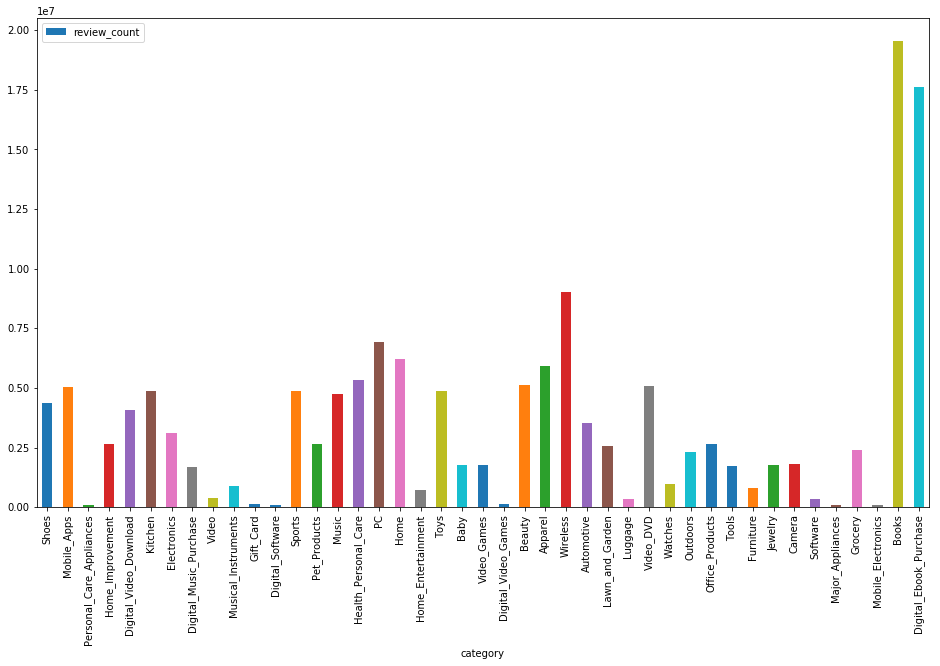

In [30]:
category_reviews.plot.bar(x='category', y='review_count', figsize=(16,9))

# Notes

To read the parquet files with read_parquet function of pandas librairy you need to install "pyarrow" or "fastparquet"
The parquet files can also be read by pyspark in the following manner:

```
df = sql_context.read.parquet(PARQUET_DIR + row['parquet'])
```

Don't forget about importing pyspark before using it:

```
from pyspark.sql import SparkSession, SQLContext
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, DateType

spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext
sql_context = SQLContext(sc)
```

If kernel dies repetadly, using del(df) might help, for instance in this way (not tested):

```
def count_reviews_with_del(parquet_file):
    """
    Counts reviews from specified file
    """
    df = pd.read_parquet(PARQUET_DIR + parquet_file)
    length = df.shape[0]
    del(df)
    return length
```

In [43]:
def mean_rating(parquet_file):
    """
    Counts reviews from specified file
    """
    df = pd.read_parquet(PARQUET_DIR + parquet_file)
    return np.mean(df.star_rating)

In [44]:
category_reviews['mean_rating'] = category_reviews['parquet'].apply(mean_rating)
category_reviews

,filename,parquet,category,review_count,mean_rating
0,amazon_reviews_us_Shoes_v1_00.tsv.gz,amazon_reviews_us_Shoes_v1_00.parquet.gzip,Shoes,4366761,4.241256
1,amazon_reviews_us_Mobile_Apps_v1_00.tsv.gz,amazon_reviews_us_Mobile_Apps_v1_00.parquet.gzip,Mobile_Apps,5033305,3.981599
2,amazon_reviews_us_Personal_Care_Appliances_v1_...,amazon_reviews_us_Personal_Care_Appliances_v1_...,Personal_Care_Appliances,85978,3.977401
3,amazon_reviews_us_Home_Improvement_v1_00.tsv.gz,amazon_reviews_us_Home_Improvement_v1_00.parqu...,Home_Improvement,2634428,4.182400
4,amazon_reviews_us_Digital_Video_Download_v1_00...,amazon_reviews_us_Digital_Video_Download_v1_00...,Digital_Video_Download,4056597,4.201211
5,amazon_reviews_us_Kitchen_v1_00.tsv.gz,amazon_reviews_us_Kitchen_v1_00.parquet.gzip,Kitchen,4880210,4.207421
6,amazon_reviews_us_Electronics_v1_00.tsv.gz,amazon_reviews_us_Electronics_v1_00.parquet.gzip,Electronics,3093750,4.035511
7,amazon_reviews_us_Digital_Music_Purchase_v1_00...,amazon_reviews_us_Digital_Music_Purchase_v1_00...,Digital_Music_Purchase,1688652,4.642865
8,amazon_reviews_us_Video_v1_00.tsv.gz,amazon_reviews_us_Video_v1_00.parquet.gzip,Video,380576,4.191478
9,amazon_reviews_us_Musical_Instruments_v1_00.ts...,amazon_reviews_us_Musical_Instruments_v1_00.pa...,Musical_Instruments,904716,4.251094


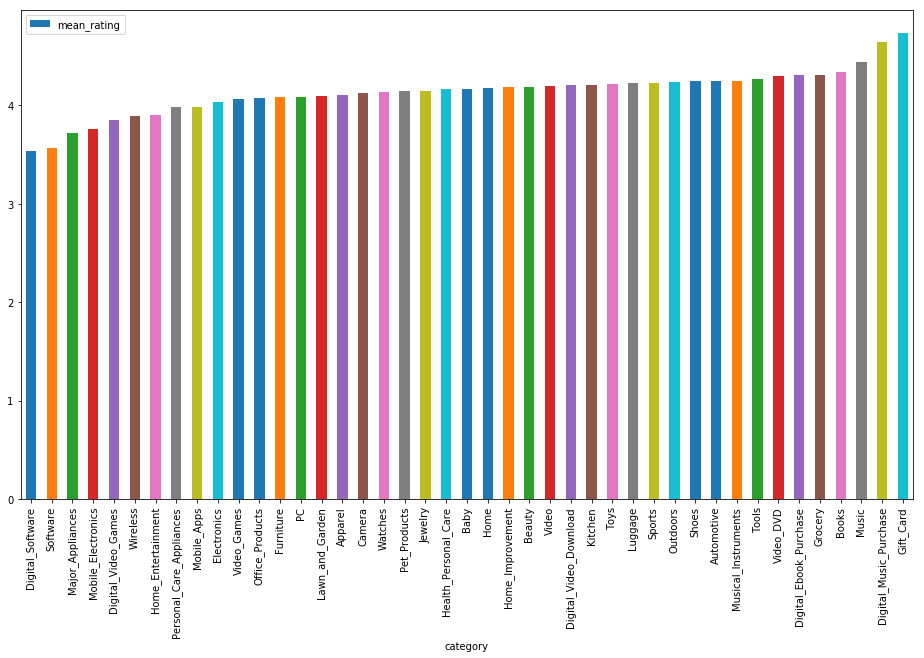

In [45]:
category_reviews.sort_values("mean_rating").plot.bar(x='category', y='mean_rating', figsize=(16,9))

In [46]:
def helpful_mean_rate(parquet_file):
    """
    Counts reviews from specified file
    """
    df = pd.read_parquet(PARQUET_DIR + parquet_file)
    return np.mean(df.helpful_votes / df.total_votes)

In [47]:
category_reviews['helpful_mean_rate'] = category_reviews['parquet'].apply(helpful_mean_rate)
category_reviews

,filename,parquet,category,review_count,mean_rating,helpful_mean_rate
0,amazon_reviews_us_Shoes_v1_00.tsv.gz,amazon_reviews_us_Shoes_v1_00.parquet.gzip,Shoes,4366761,4.241256,0.738165
1,amazon_reviews_us_Mobile_Apps_v1_00.tsv.gz,amazon_reviews_us_Mobile_Apps_v1_00.parquet.gzip,Mobile_Apps,5033305,3.981599,0.651378
2,amazon_reviews_us_Personal_Care_Appliances_v1_...,amazon_reviews_us_Personal_Care_Appliances_v1_...,Personal_Care_Appliances,85978,3.977401,0.777162
3,amazon_reviews_us_Home_Improvement_v1_00.tsv.gz,amazon_reviews_us_Home_Improvement_v1_00.parqu...,Home_Improvement,2634428,4.182400,0.751364
4,amazon_reviews_us_Digital_Video_Download_v1_00...,amazon_reviews_us_Digital_Video_Download_v1_00...,Digital_Video_Download,4056597,4.201211,0.414669
5,amazon_reviews_us_Kitchen_v1_00.tsv.gz,amazon_reviews_us_Kitchen_v1_00.parquet.gzip,Kitchen,4880210,4.207421,0.761001
6,amazon_reviews_us_Electronics_v1_00.tsv.gz,amazon_reviews_us_Electronics_v1_00.parquet.gzip,Electronics,3093750,4.035511,0.702693
7,amazon_reviews_us_Digital_Music_Purchase_v1_00...,amazon_reviews_us_Digital_Music_Purchase_v1_00...,Digital_Music_Purchase,1688652,4.642865,0.729697
8,amazon_reviews_us_Video_v1_00.tsv.gz,amazon_reviews_us_Video_v1_00.parquet.gzip,Video,380576,4.191478,0.675501
9,amazon_reviews_us_Musical_Instruments_v1_00.ts...,amazon_reviews_us_Musical_Instruments_v1_00.pa...,Musical_Instruments,904716,4.251094,0.716679


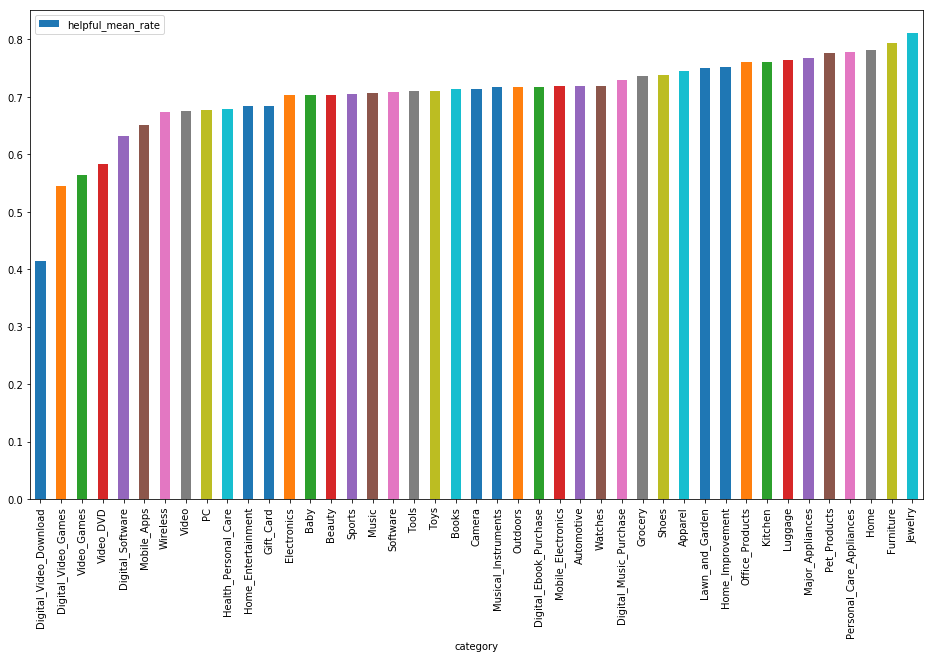

In [48]:
category_reviews.sort_values("helpful_mean_rate").plot.bar(x='category', y='helpful_mean_rate', figsize=(16,9))

### Bad or Good reviewer ?

To answer this question, we could check if the reviews of reviewer are helpful and also if the rating given by the reviewer are normally distributed and not uniformly #TODO 

In [ ]:
# compute ratio for helfulness of review
df_shoes["helpful_rate"] = df_shoes["helpful_votes"] / df_shoes["total_votes"]

# keep only review with more than 5 votes
df_shoes_10 = df_shoes[df_shoes["total_votes"] > 10]

def func(x):
    return len(x) > 5

# groupby customer_id and filter to keep only customer with more than
# 5 reviews and then compute the mean of their helpful_rate
df_mix = df_shoes.groupby("customer_id").filter(func)
df_mix["helpful_rate"].fillna(0, inplace=True)

In [92]:
df_mix_10 = df_shoes_10.groupby("customer_id").filter(func)
df_mix_10["helpful_rate"].fillna(0, inplace=True)

/anaconda3/envs/ada/lib/python3.6/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [93]:
# mhr = mean helpful rate
mhr_by_customer = df_mix.groupby("customer_id")["helpful_rate"].aggregate(np.mean)
mhr10_by_customer = df_mix_10.groupby("customer_id")["helpful_rate"].aggregate(np.mean)

In [99]:
mhr10_by_customer

customer_id
4732309     0.940373
9900175     0.572156
10213463    0.932537
10235320    0.983735
12534586    0.986111
12829099    0.865976
13360861    1.000000
13454355    0.950278
13551244    0.893525
13604681    0.988053
14099961    0.968410
14806730    0.947479
16396959    0.879028
16884100    0.968361
17982182    0.951131
18065979    0.923864
18737625    1.000000
21012418    0.947818
22073263    0.961538
22478667    0.930571
24984746    0.878157
27976641    0.899297
34012789    0.957984
34474855    0.944615
35904721    0.986581
36803016    0.976244
39284646    0.558146
40260478    0.937752
40333751    0.886236
40581989    0.966167
41592817    0.344556
43313129    0.436732
44225817    0.856568
45174642    0.890751
45457807    0.619042
45798078    0.972339
46137405    0.920697
49086608    0.869190
50551699    0.906430
50591678    0.938417
51250504    0.922619
51346302    0.970529
51828003    0.911467
52425321    0.931043
52761203    0.867152
52988732    0.872882
Name: helpful_rate, dt